# Initial bad prediction

## Import needed bibs

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

## Exchange null values with mean

In [65]:
df = pd.read_csv('./../../../timeseries/merged/combined_timeseries.csv')

In [66]:
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df.select_dtypes(include=['float64', 'int64'])))
df_imputed.columns = df.select_dtypes(include=['float64', 'int64']).columns
df_imputed['Timestamp'] = df['Timestamp']  # Timestamp (oder andere nicht-numerische Spalten) hinzufügen, falls benötigt

# Feature Selection

In [67]:
X = df_imputed[['cpu_pod_frontend', 'cpu_system', 'slower_memory', 'network_outgoing_system']]
y = df_imputed['Durchschnittliche Antwortzeitintervalle']

In [68]:
X.head(5)

,cpu_pod_frontend,cpu_system,slower_memory,network_outgoing_system
0,0.000232,0.00166,1.335923e+10,5907.0
1,0.000232,0.00175,1.335923e+10,5911.0
2,0.000232,0.00181,1.335923e+10,6194.0
3,0.000232,0.00188,1.335923e+10,6104.0
4,0.000232,0.00160,1.335923e+10,6069.0


## Modell trainieren und auswählen

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Decision Tree Regressor

In [70]:
# Trainieren des Modells
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

## Linear Regression

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [71]:
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 2650734.6912431307


In [72]:
comparison_df = pd.DataFrame({'Tatsächliche Werte': y_test, 'Vorhersagewerte': y_pred})
# Zurücksetzen des Index, um die Zeilennummerierung zu vereinfachen
comparison_df.reset_index(drop=True, inplace=True)

print(comparison_df)

# Optional: Berechnung und Ausgabe des Mean Squared Error zur Bewertung
print("MSE:", mean_squared_error(y_test, y_pred))

     Tatsächliche Werte  Vorhersagewerte
0            177.000000       177.000000
1           1657.779221      1916.753425
2            850.142857      1066.555556
3           1471.245902       682.041237
4            224.000000       147.200000
..                  ...              ...
786          149.000000       150.000000
787          221.056604       271.906667
788          170.100000        34.600000
789          831.964706       579.730769
790         1810.787097      1865.500000

[791 rows x 2 columns]
MSE: 2650734.6912431307


## Plot to show residuals

IndexError: index 1056 is out of bounds for axis 0 with size 791

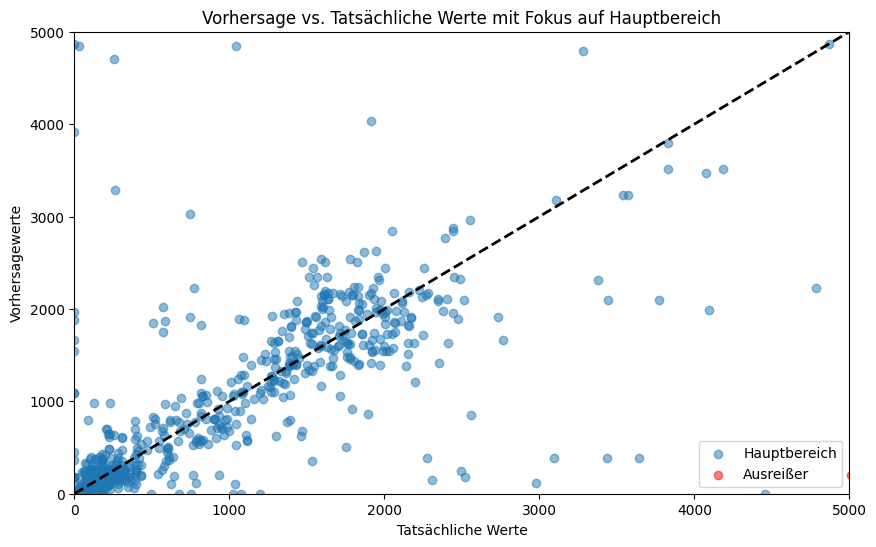

In [75]:
plt.figure(figsize=(10, 6))

# Definieren des Hauptbereichs für die Darstellung
hauptbereich_max = 5000

# Erstellen eines Scatter-Plots für Werte innerhalb des Hauptbereichs
im_hauptbereich = y_test <= hauptbereich_max
plt.scatter(y_test[im_hauptbereich], y_pred[im_hauptbereich], alpha=0.5, label='Hauptbereich')

# Optional: Hervorheben von Ausreißern mit anderer Farbe oder Marker
ausreisser = y_test > hauptbereich_max
plt.scatter(y_test[ausreisser], y_pred[ausreisser], color='red', alpha=0.5, label='Ausreißer')

# Anpassen der y-Achse des Plots, um den Fokus auf den Hauptbereich zu setzen
plt.ylim(0, hauptbereich_max)

# Anpassen der x-Achse, falls gewünscht
plt.xlim(0, hauptbereich_max)

plt.title('Vorhersage vs. Tatsächliche Werte mit Fokus auf Hauptbereich')
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhersagewerte')
plt.plot([0, hauptbereich_max], [0, hauptbereich_max], 'k--', lw=2)  # Diagonale Linie im Hauptbereich
plt.legend()

# Optional: Ausreißer außerhalb des Plots hervorheben oder kennzeichnen
for i in y_test[ausreisser].index:
    plt.annotate(f'Ausreißer', (y_test[i], y_pred[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

## Plot with outliers

IndexError: index 1056 is out of bounds for axis 0 with size 791

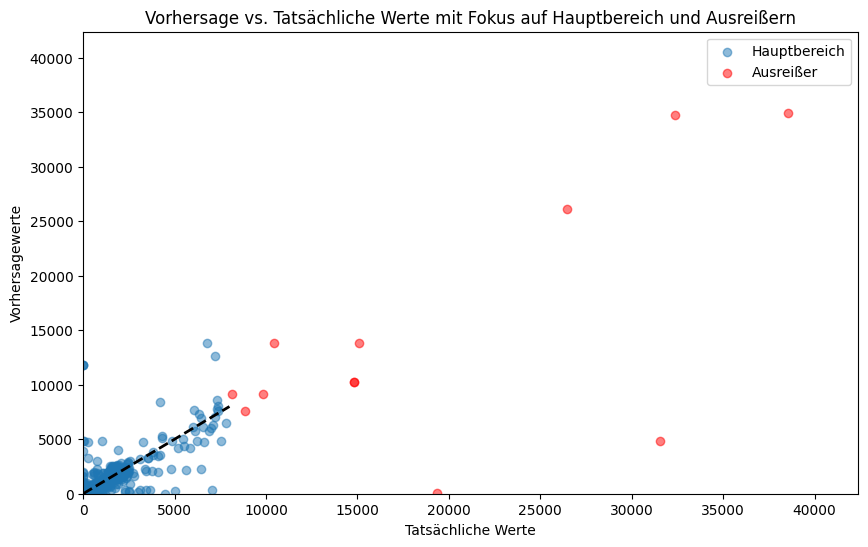

In [77]:
plt.figure(figsize=(10, 6))

# Definieren des Hauptbereichs für die Darstellung
hauptbereich_max = 8000

# Erstellen eines Scatter-Plots für Werte innerhalb des Hauptbereichs
im_hauptbereich = y_test <= hauptbereich_max
plt.scatter(y_test[im_hauptbereich], y_pred[im_hauptbereich], alpha=0.5, label='Hauptbereich')

# Hervorheben von Ausreißern mit anderer Farbe oder Marker
ausreisser = y_test > hauptbereich_max
plt.scatter(y_test[ausreisser], y_pred[ausreisser], color='red', alpha=0.5, label='Ausreißer')

# Anpassen der y-Achse des Plots, um den Fokus auf den Hauptbereich zu setzen, aber auch Ausreißer anzeigen
plt.ylim(0, max(max(y_test), max(y_pred), hauptbereich_max) * 1.1)

# Anpassen der x-Achse, um den Fokus auf den Hauptbereich zu setzen, aber auch Ausreißer anzeigen
plt.xlim(0, max(max(y_test), max(y_pred), hauptbereich_max) * 1.1)

plt.title('Vorhersage vs. Tatsächliche Werte mit Fokus auf Hauptbereich und Ausreißern')
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhersagewerte')
plt.plot([0, hauptbereich_max], [0, hauptbereich_max], 'k--', lw=2)  # Diagonale Linie im Hauptbereich
plt.legend()

# Ausreißer außerhalb des Plots hervorheben oder kennzeichnen
for i in y_test[ausreisser].index:
    plt.annotate(f'Ausreißer', (y_test[i], y_pred[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

## Show r2 Score

In [76]:
r2 = r2_score(y_test, y_pred)
print("R²-Score:", r2)

R²-Score: 0.6800154010102333
